In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from open_prices.config import EXTERNAL_DATA_FILE
from open_prices.dataset import checkListTypeAndConvert, noneSumCalc, printColumnUnique

pd.options.display.float_format = '{:.2f}'.format

2025-12-20 14:53:18.480 | INFO     | open_prices.config:<module>:11 - PROJ_ROOT path is: /home/ornellah/Documents/Git project/open_prices


In [3]:
df = pd.read_parquet(f"{EXTERNAL_DATA_FILE}", engine="fastparquet")

## Aperçu des données

In [4]:
df

,id,type,product_code,product_name,category_tag,labels_tags,origins_tags,price,price_is_discounted,price_without_discount,...,location_osm_address_postcode,location_osm_address_city,location_osm_address_country,location_osm_address_country_code,location_osm_lat,location_osm_lon,location_website_url,location_source,location_created,location_updated
0,42629,PRODUCT,3560070283484,None,None,None,None,1.25,False,NaN,...,75012,Paris,France,FR,48.85,2.37,None,None,2024-01-16 18:29:47.461589,2024-08-25 13:41:04.572275
1,42630,PRODUCT,3560070206469,None,None,None,None,1.99,False,NaN,...,75012,Paris,France,FR,48.85,2.37,None,None,2024-01-16 18:29:47.461589,2024-08-25 13:41:04.572275
2,39637,PRODUCT,3123930711758,None,None,None,None,3.60,False,NaN,...,17470,Aulnay,France,FR,46.03,-0.35,None,None,2024-10-19 08:12:54.613170,2024-10-19 08:12:55.036233
3,39573,PRODUCT,3500390010247,None,None,None,None,19.95,False,NaN,...,38100,Grenoble,France,FR,45.18,5.73,None,None,2023-12-24 10:09:56.269605,2024-09-01 10:44:35.488131
4,33784,PRODUCT,8033976484743,None,None,None,None,2.99,False,NaN,...,91026,Mazara del Vallo,Italia,IT,37.65,12.60,None,None,2024-08-26 13:54:56.009100,2024-08-26 17:59:56.261823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152396,167585,PRODUCT,4001724039204,None,None,None,None,3.75,False,NaN,...,48350,Kotka,Suomi / Finland,FI,60.48,26.86,None,None,2025-11-25 21:31:57.793348,2025-11-25 21:31:58.453033
152397,167586,PRODUCT,7340191157590,None,None,None,None,1.59,False,NaN,...,48350,Kotka,Suomi / Finland,FI,60.48,26.86,None,None,2025-11-25 21:31:57.793348,2025-11-25 21:31:58.453033
152398,167587,PRODUCT,6408430340538,None,None,None,None,4.09,False,NaN,...,48350,Kotka,Suomi / Finland,FI,60.48,26.86,None,None,2025-11-25 21:31:57.793348,2025-11-25 21:31:58.453033
152399,167588,PRODUCT,6405799002466,None,None,None,None,3.19,False,NaN,...,48350,Kotka,Suomi / Finland,FI,60.48,26.86,None,None,2025-11-25 21:31:57.793348,2025-11-25 21:31:58.453033


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152401 entries, 0 to 152400
Data columns (total 48 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   id                                 152401 non-null  int64         
 1   type                               152401 non-null  object        
 2   product_code                       145759 non-null  object        
 3   product_name                       86053 non-null   object        
 4   category_tag                       6642 non-null    object        
 5   labels_tags                        3755 non-null    object        
 6   origins_tags                       6355 non-null    object        
 7   price                              152401 non-null  float64       
 8   price_is_discounted                152401 non-null  bool          
 9   price_without_discount             9637 non-null    float64       
 10  discount_type       

## Valeurs manquantes

In [6]:
dfNone = noneSumCalc(df)

In [7]:
dfNone.sort_values('noneSum', ascending=False)

,columns,noneSum
44,location_website_url,1.00
45,location_source,1.00
5,labels_tags,0.98
10,discount_type,0.96
6,origins_tags,0.96
4,category_tag,0.96
11,price_per,0.96
29,proof_receipt_price_total,0.95
28,proof_receipt_price_count,0.94
9,price_without_discount,0.94


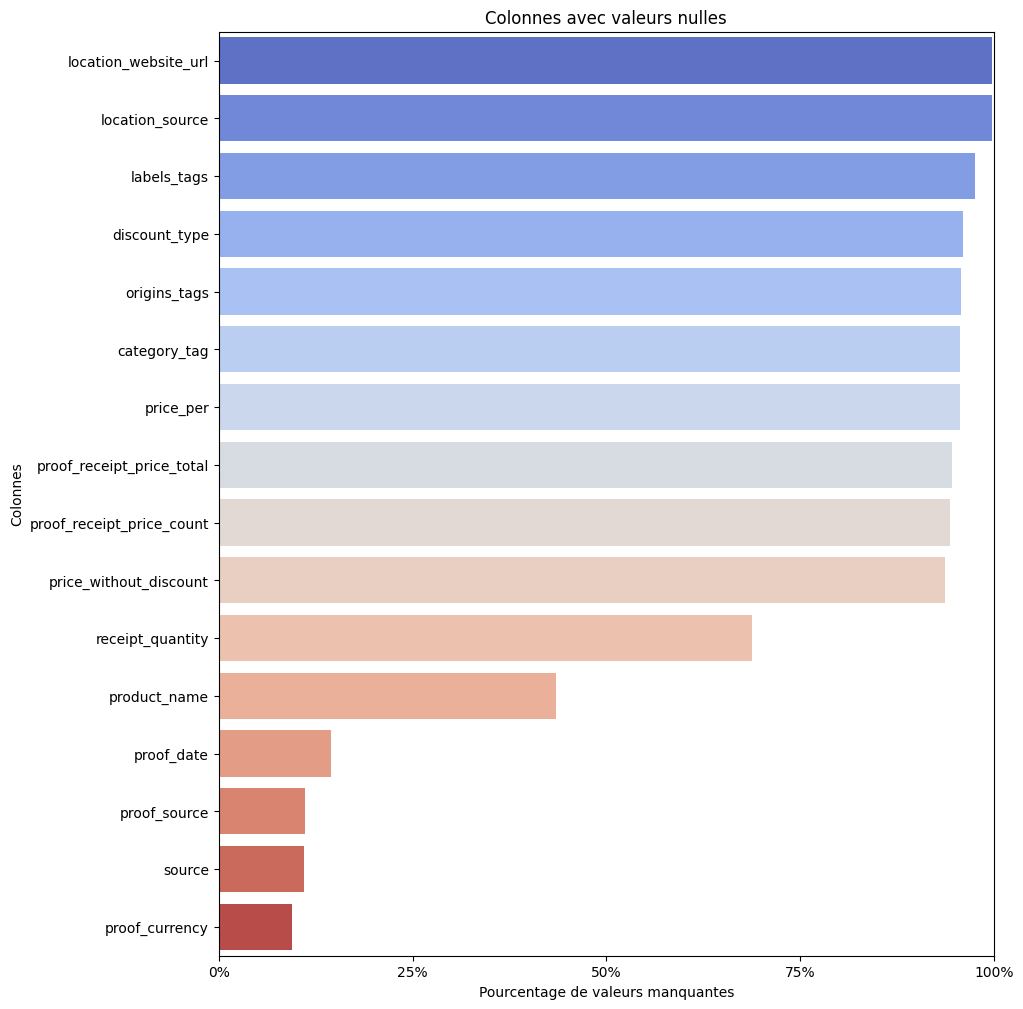

In [8]:
dfNone_sorted = dfNone.sort_values('noneSum', ascending=False)
dfNone_plot = dfNone_sorted[dfNone_sorted['noneSum'] > 0.09]

plt.figure(figsize=(10, 12))
sns.barplot(x='noneSum', y='columns', data=dfNone_plot, hue='columns', palette='coolwarm')
plt.xlabel("Pourcentage de valeurs manquantes")
plt.ylabel("Colonnes")
plt.title("Colonnes avec valeurs nulles")
plt.xlim(0, 1)
plt.xticks([0, 0.25, 0.5, 0.75, 1], ['0%', '25%', '50%', '75%', '100%'])
plt.show()

## Pré-analyse variables catégorielles et numériques

In [9]:
checkListTypeAndConvert(df, True)

[]

In [10]:
printColumnUnique(df)


--- id ---
152401
[ 42629  42630  39637 ... 167587 167588 167589]

--- type ---
2
['PRODUCT' 'CATEGORY']

--- product_code ---
80552
['3560070283484' '3560070206469' '3123930711758' ... '3046920013987'
 '6437005064753' '7340191145962']

--- product_name ---
64209
[None 'BIO SAURE SAHNE' 'Confiture Fruits des Bois' ...
 '184G BTE CHAMPS-ELYSEES LAI' '110G KINDER MOULAGE P NO CARA'
 '120G LINDT SACHET MINI MOUL']

--- category_tag ---
400
[None 'en:broccoli' 'en:garlic' 'en:bananas' 'en:carrots' 'en:chestnuts'
 'en:baguettes' 'en:cucumbers' 'en:lemons'
 'en:traditional-french-baguette' 'en:aubergines' 'en:clementines'
 'en:strawberries' 'en:yellow-kiwis' 'en:chards' 'en:fennel-bulbs'
 'en:oranges' 'en:kiwis' 'en:leaf-salads' 'en:white-cabbage'
 'en:mushrooms' 'en:turnip' 'en:apples' 'en:onions' 'en:asparagus'
 'en:potatoes' 'en:radishes' 'en:pumpkins' 'en:leeks' 'en:berries'
 'en:ground-black-peppers' 'en:tomatoes' 'en:eggs' 'en:avocados'
 'en:pears' 'en:kakis' 'en:cauliflowers' 'en:zuc

In [11]:
numCols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
catCols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print(f"Variables numériques ({len(numCols)}) : {numCols}")
print(f"Variables catégorielles ({len(catCols)}) : {catCols}")

Variables numériques (9) : ['id', 'price', 'price_without_discount', 'location_osm_id', 'proof_id', 'proof_receipt_price_count', 'proof_receipt_price_total', 'location_osm_lat', 'location_osm_lon']
Variables catégorielles (29) : ['type', 'product_code', 'product_name', 'category_tag', 'labels_tags', 'origins_tags', 'price_is_discounted', 'discount_type', 'price_per', 'currency', 'location_osm_type', 'owner', 'source', 'proof_file_path', 'proof_mimetype', 'proof_type', 'proof_currency', 'proof_owner', 'proof_source', 'location_type', 'location_osm_display_name', 'location_osm_tag_key', 'location_osm_tag_value', 'location_osm_address_postcode', 'location_osm_address_city', 'location_osm_address_country', 'location_osm_address_country_code', 'location_website_url', 'location_source']


## Analyse variables numériques

In [12]:
df[numCols].describe()

,id,price,price_without_discount,location_osm_id,proof_id,proof_receipt_price_count,proof_receipt_price_total,location_osm_lat,location_osm_lon
count,152401.00,152401.00,9637.00,152114.00,152272.00,8589.00,8278.00,151900.00,151900.00
mean,83053.24,30.48,1157.07,2508375266.95,25683.66,13.27,162.84,47.11,-5.68
std,50208.90,1825.08,102276.99,3278440953.54,17478.60,9.97,934.03,6.88,39.91
min,1.00,0.00,0.30,40767.00,1.00,1.00,0.50,-45.01,-159.80
25%,39665.00,1.99,2.79,134511596.00,11372.75,6.00,14.66,45.15,2.36
50%,79690.00,3.21,5.29,872934393.00,22841.00,10.00,31.08,45.76,5.33
75%,129593.00,6.09,9.99,4212609990.00,39112.00,18.00,69.79,48.90,5.73
max,169029.00,604000.00,9999999.00,13310499701.00,58830.00,65.00,15536.28,69.47,174.61


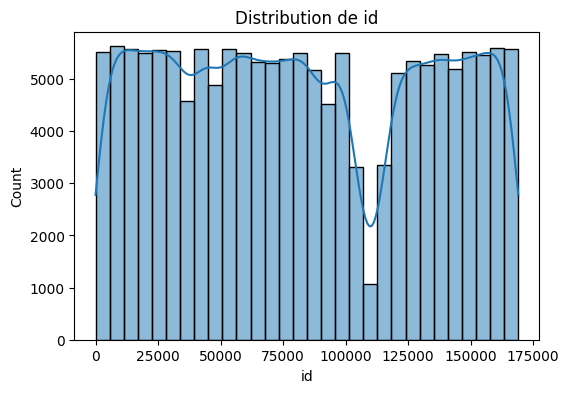

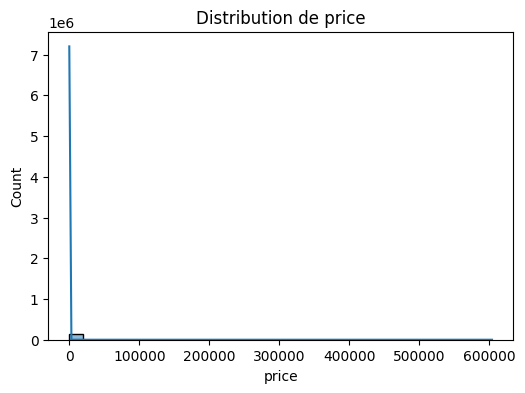

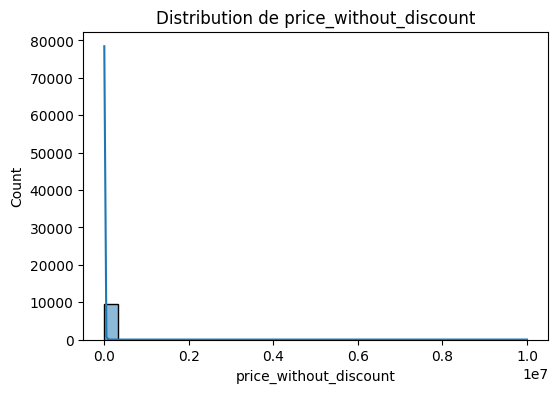

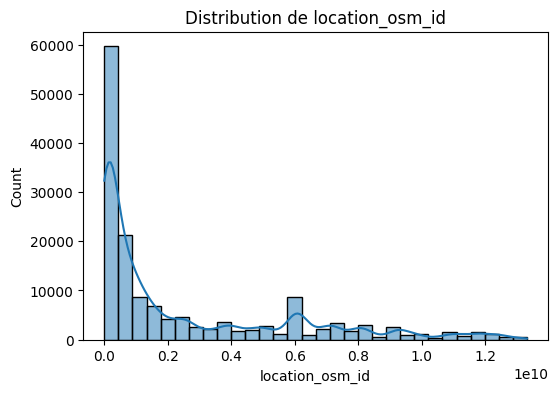

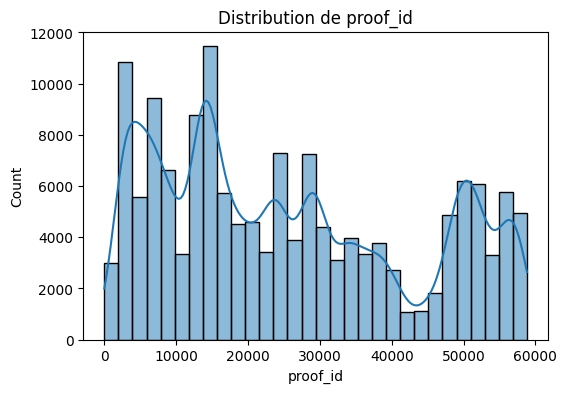

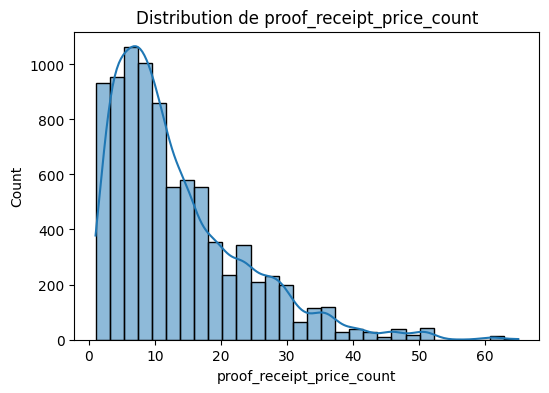

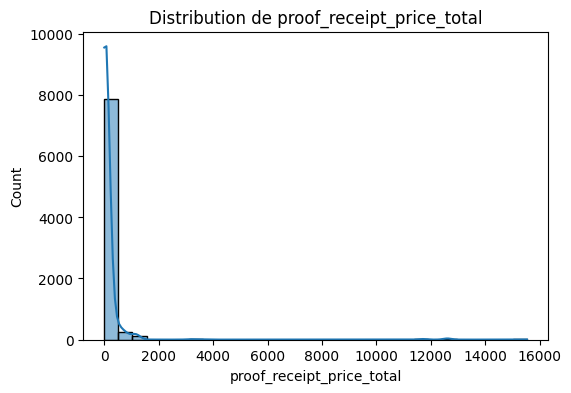

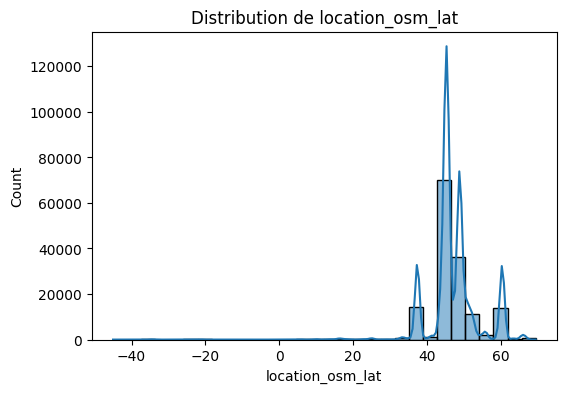

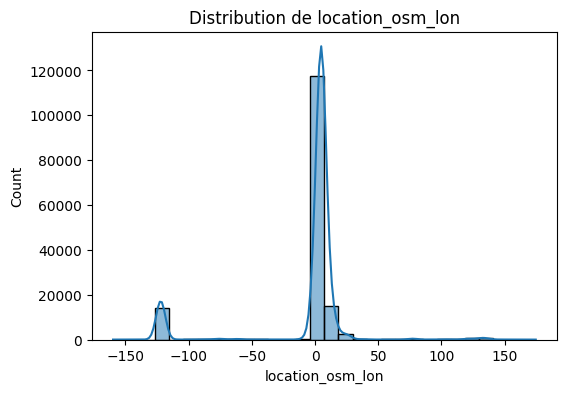

In [13]:
for col in numCols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution de {col}")
    plt.show()

## Analyse variables catégorielles

In [14]:
for col in catCols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False).head(10))


--- type ---
type
PRODUCT     145759
CATEGORY      6642
Name: count, dtype: int64

--- product_code ---
product_code
None             6642
3450970024686     153
3450970006767     141
0292475000000     129
3017620422003     120
3451790563379      93
3270190128717      92
80861263           91
3274080001005      90
3523230030793      89
Name: count, dtype: int64

--- product_name ---
product_name
None                              66348
                                   1348
BAVETTE ALOYAU X2                   129
NUTELLA                             125
BN PETIT DEJ CEREALE 200G            72
YAOURT FRTS ROUGE 8X125G DELIS       63
PATE A TARTINER                      60
10 DOSETTES NOISETTES 70G PLA        60
CRISTALINE EAU SOUR 6X1,5L PAL       59
*FM BLC PLET FU HALAL X6T 180G       56
Name: count, dtype: int64

--- category_tag ---
category_tag
None            145759
en:bananas         298
en:apples          256
en:tomatoes        226
en:carrots         201
en:oranges         161
en

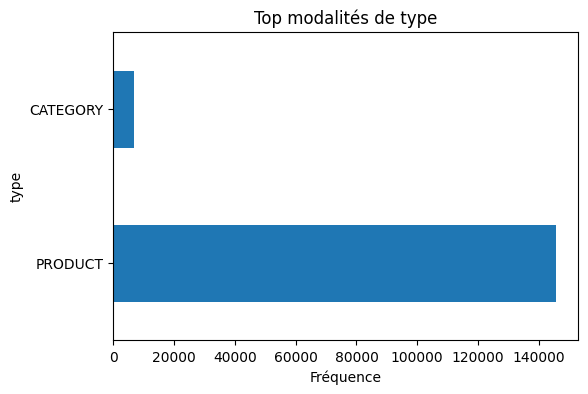

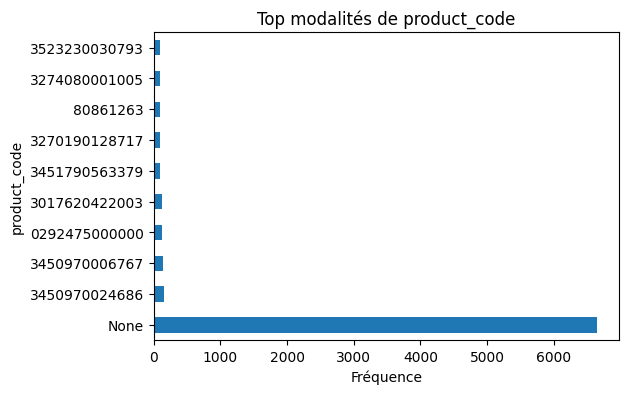

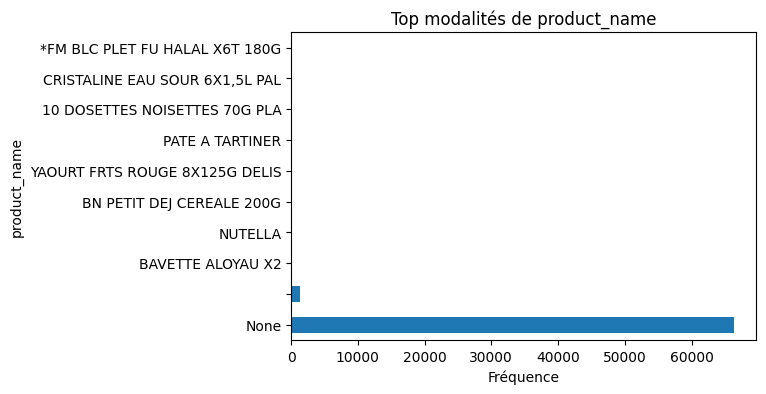

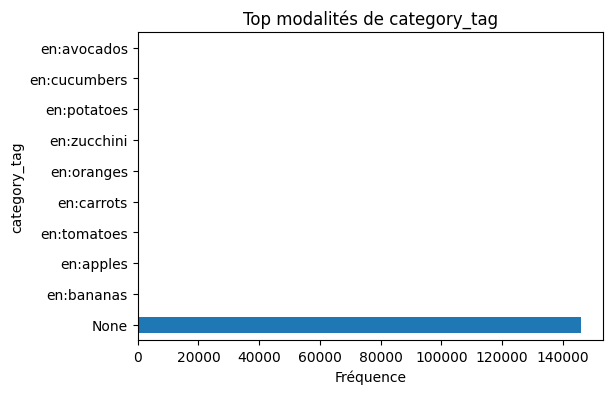

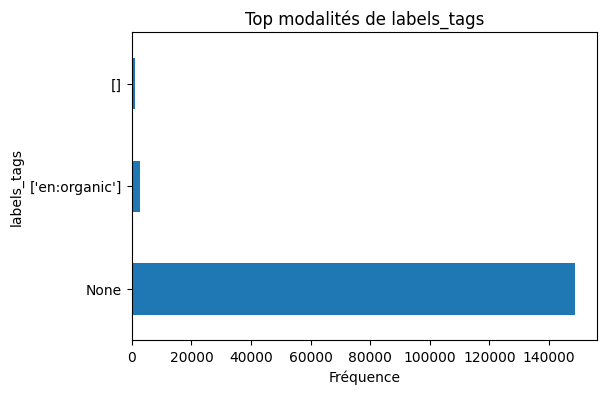

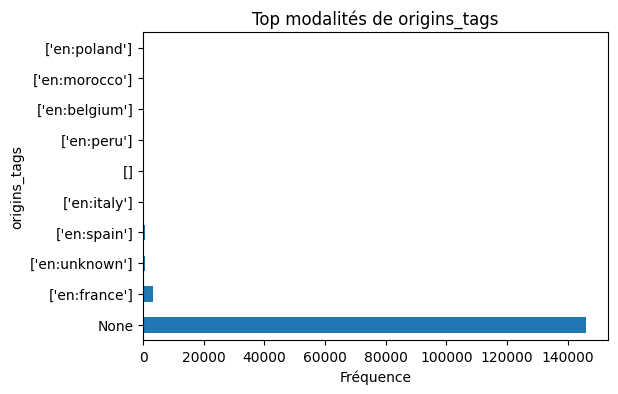

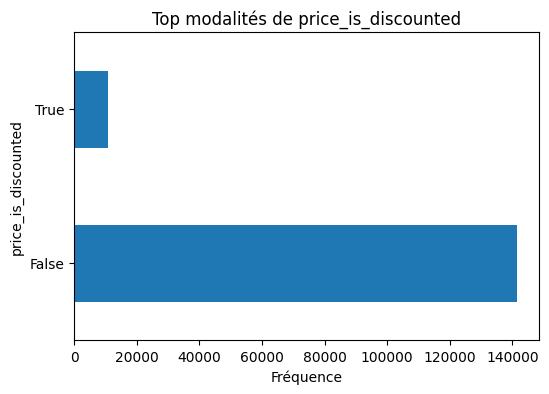

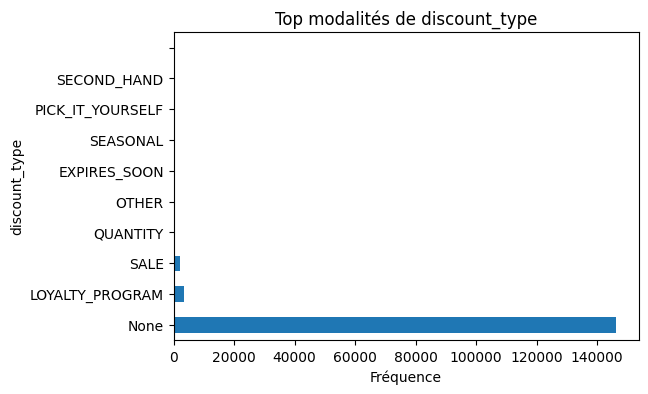

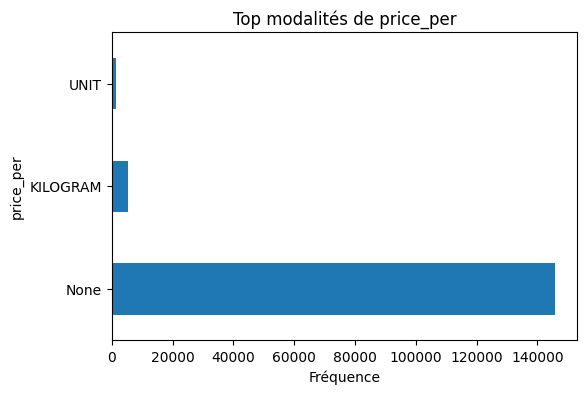

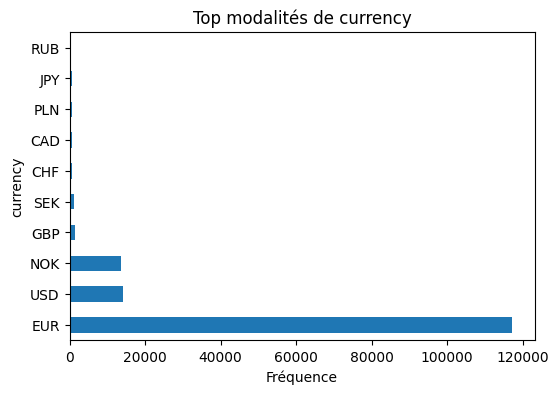

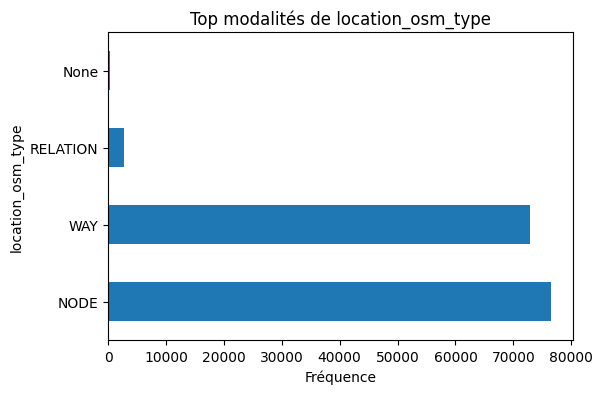

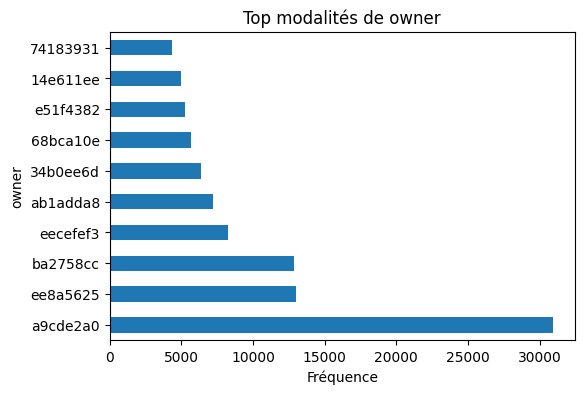

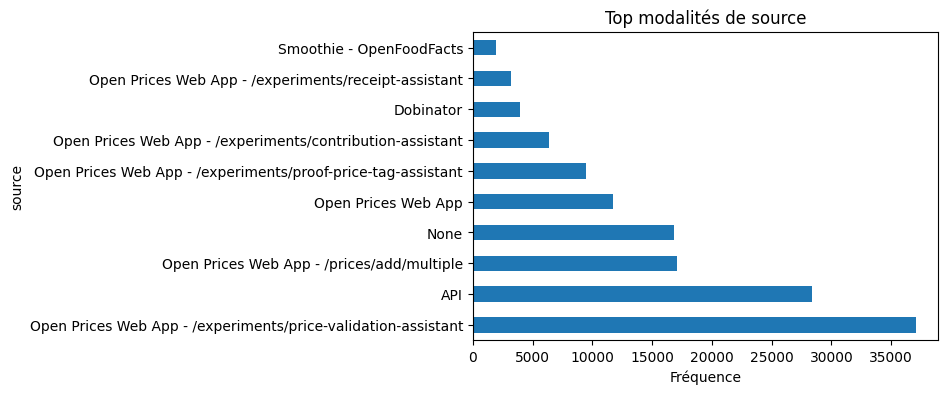

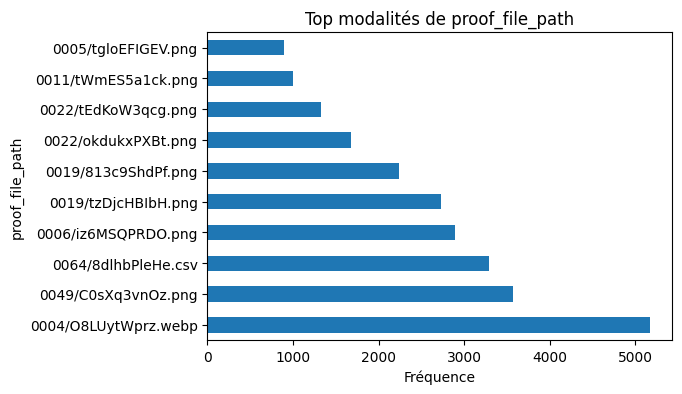

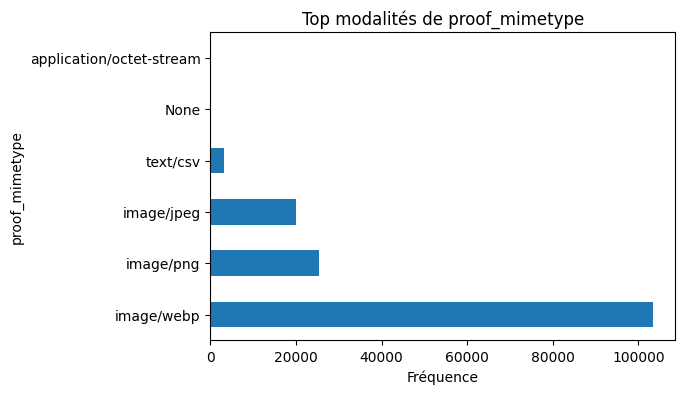

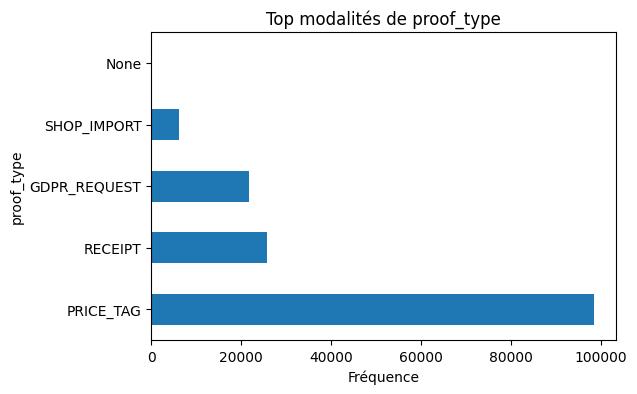

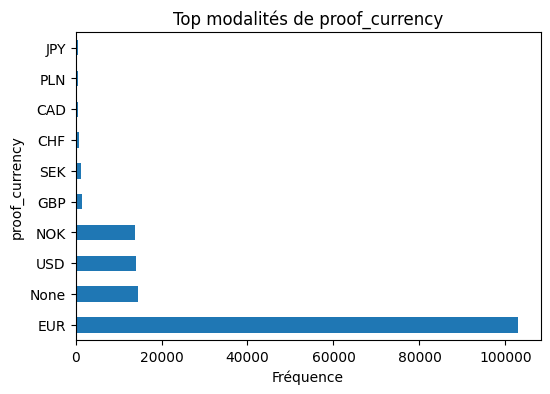

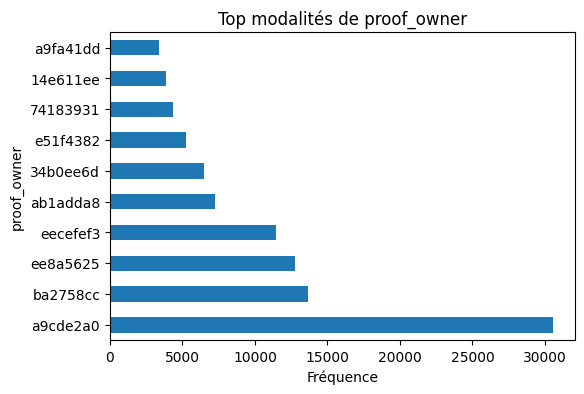

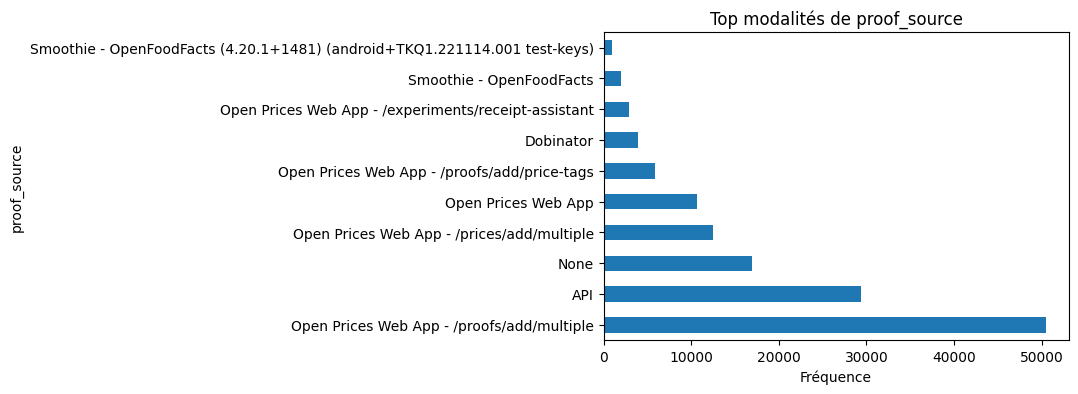

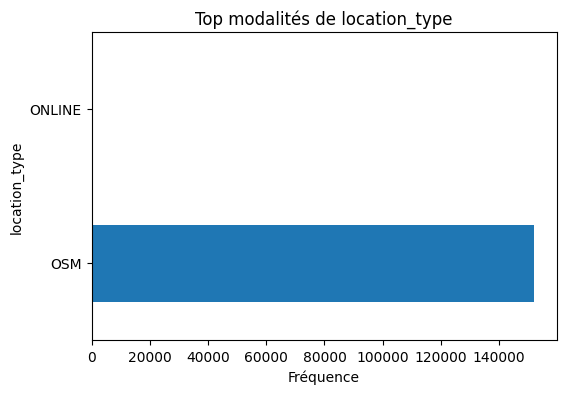

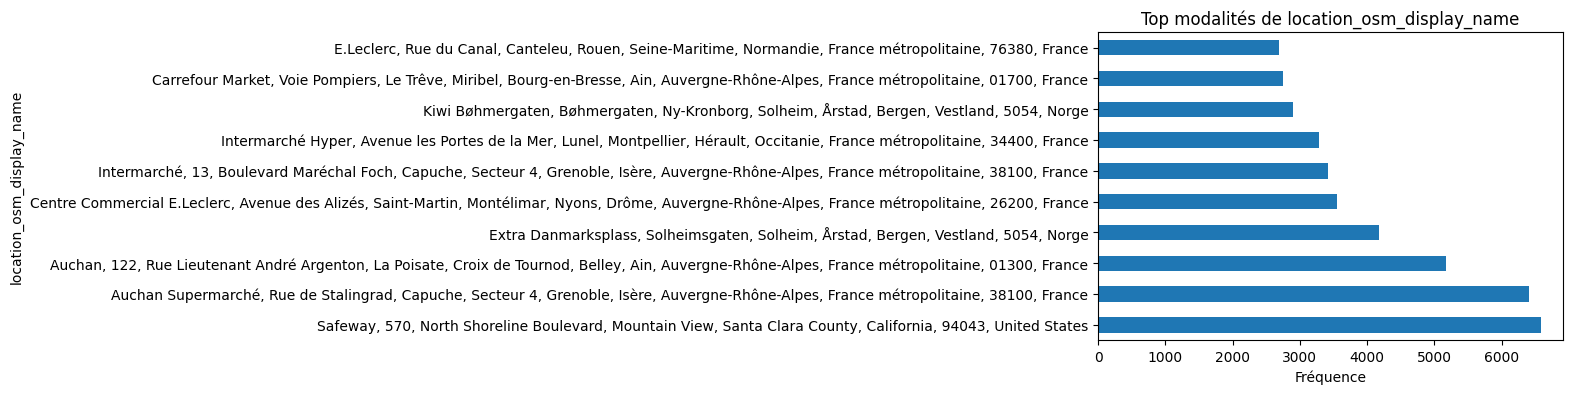

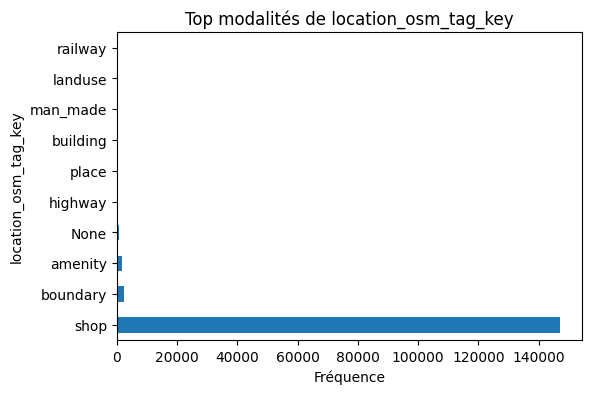

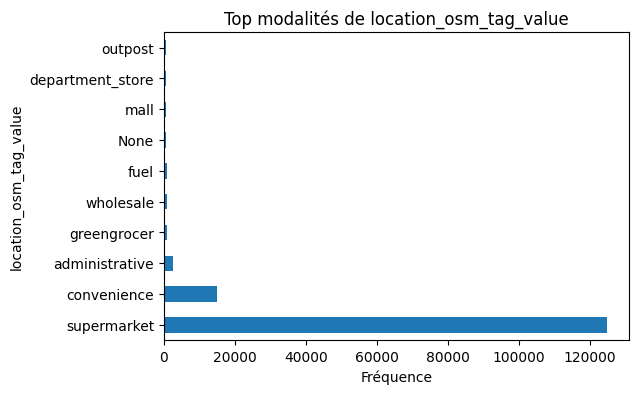

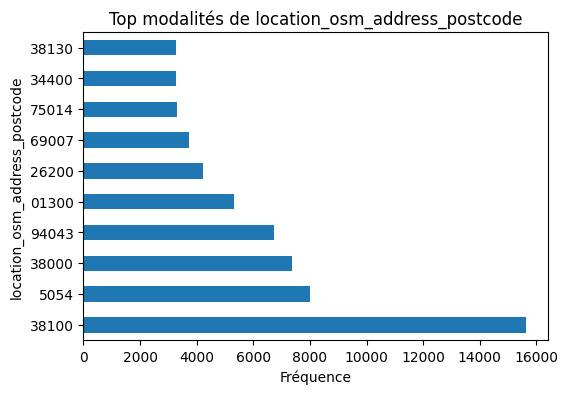

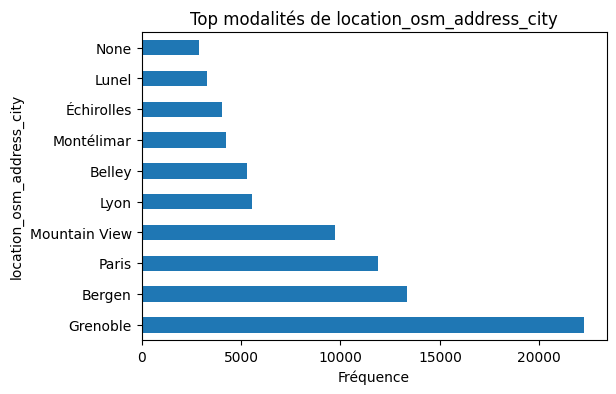

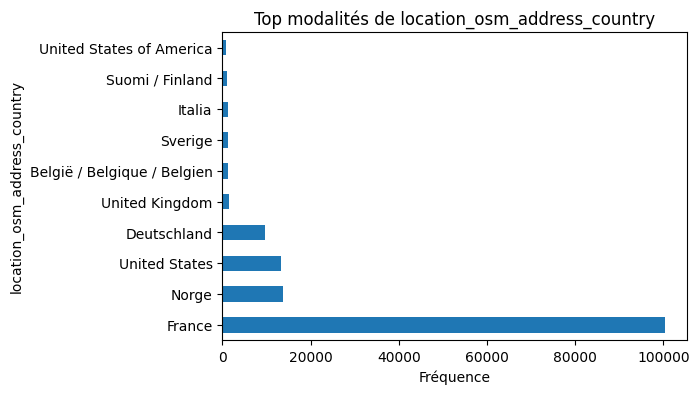

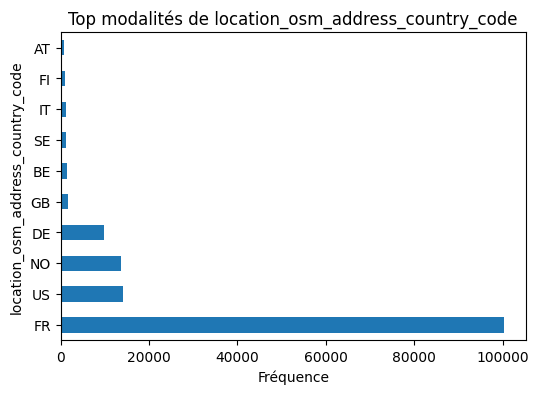

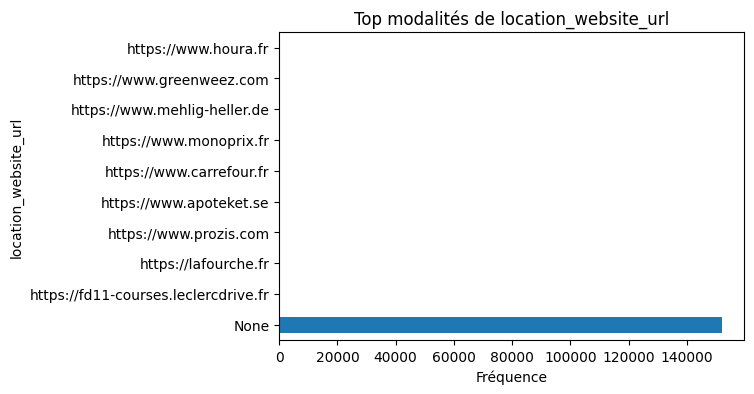

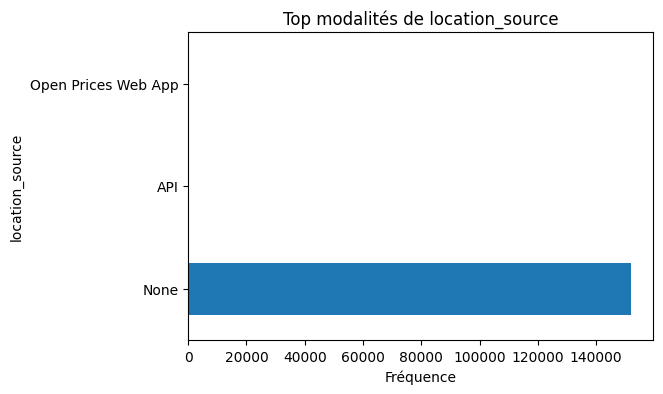

In [15]:
for col in catCols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts(dropna=False).head(10).plot(kind='barh')
    plt.title(f"Top modalités de {col}")
    plt.xlabel("Fréquence")
    plt.show()

## Corrélations numériques

In [16]:
dfCorr = df[numCols].corr()

In [17]:
dfCorr

,id,price,price_without_discount,location_osm_id,proof_id,proof_receipt_price_count,proof_receipt_price_total,location_osm_lat,location_osm_lon
id,1.00,0.00,0.01,0.01,0.98,-0.01,0.02,-0.15,-0.38
price,0.00,1.00,0.20,0.03,0.00,0.12,0.64,-0.04,0.03
price_without_discount,0.01,0.20,1.00,0.04,0.01,0.07,0.39,-0.03,0.02
location_osm_id,0.01,0.03,0.04,1.00,-0.00,-0.03,0.00,0.14,0.09
proof_id,0.98,0.00,0.01,-0.00,1.00,-0.00,0.01,-0.17,-0.42
proof_receipt_price_count,-0.01,0.12,0.07,-0.03,-0.00,1.00,0.28,0.19,0.11
proof_receipt_price_total,0.02,0.64,0.39,0.00,0.01,0.28,1.00,0.10,0.32
location_osm_lat,-0.15,-0.04,-0.03,0.14,-0.17,0.19,0.10,1.00,0.37
location_osm_lon,-0.38,0.03,0.02,0.09,-0.42,0.11,0.32,0.37,1.00


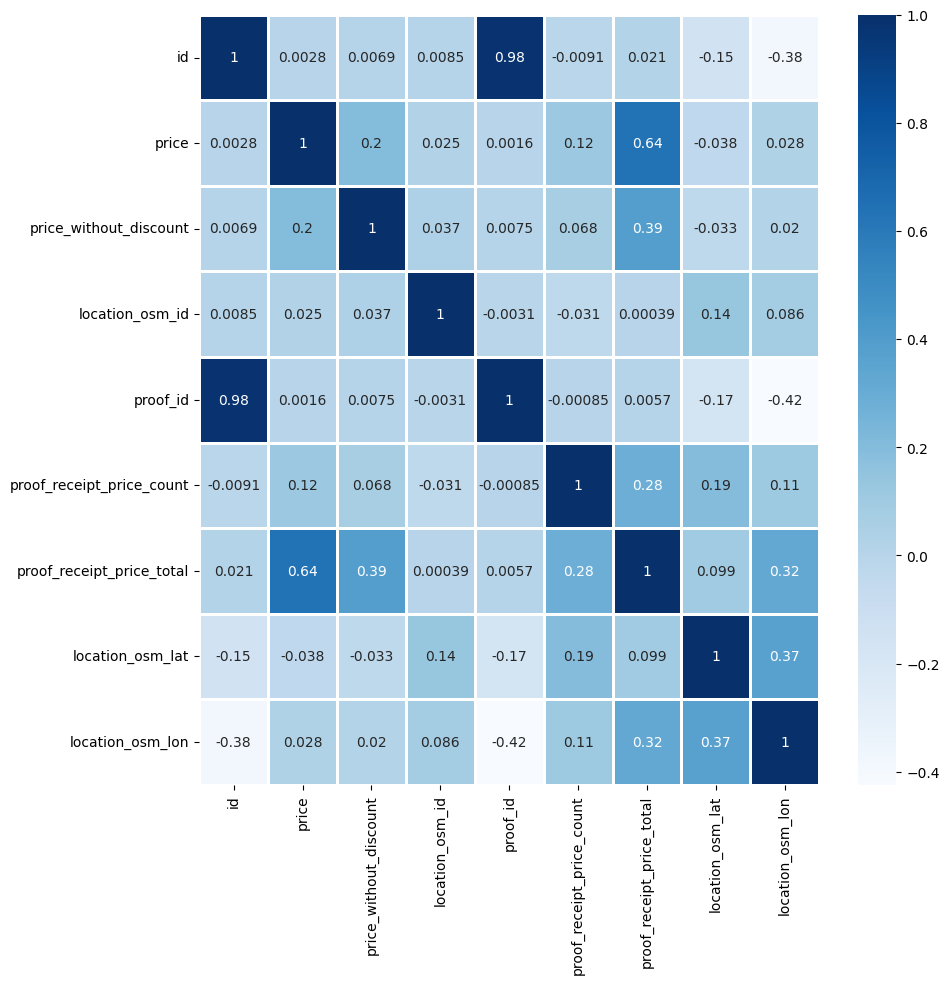

In [18]:
fig, axes = plt.subplots(figsize=(10, 10))
sns.heatmap(dfCorr, cmap="Blues", linewidths=0.9, annot=True, ax=axes)
plt.show()